# Propensity Score Matching

In [1]:
#Import basic libariaries
%matplotlib inline
import math
import numpy as np
import scipy
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [4]:
names = ['Treated', 'Age', 'Education', 'Black', 'Hispanic', 'Married',
         'Nodegree', 'RE74', 'RE75', 'RE78']
treated = pd.read_table('nswre74_treated.txt', sep = '\s+',
                        header = None, names = names)
control = pd.read_table('psid_controls.txt', sep='\s+', 
                        header = None, names = names)
data = pd.concat([treated, control])
data.head()

,Treated,Age,Education,Black,Hispanic,Married,Nodegree,RE74,RE75,RE78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.0460
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.8940
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.4500
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.1460
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.7899


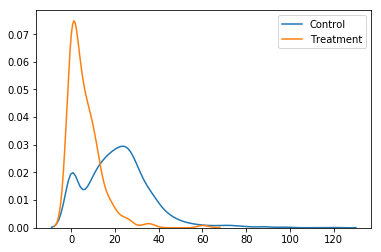

In [5]:
data[['RE74_div', 'RE75_div', 'RE78_div']] = data[['RE74', 'RE75', 'RE78']] / 1000


sns.kdeplot(data[data.Treated == 0].RE78_div, label='Control')
sns.kdeplot(data[data.Treated == 1].RE78_div, label='Treatment')

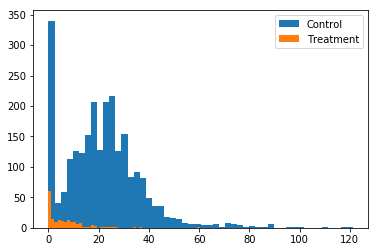

In [6]:
plt.hist(data[data.Treated == 0].RE78_div, label='Control', bins=50);
plt.hist(data[data.Treated == 1].RE78_div, label='Treatment', bins=50);
plt.legend();

In [11]:
from causalinference import CausalModel

In [12]:
causal_model = CausalModel(
    X=data[['Age', 'Education', 'Black', 'Hispanic', 'Married','Nodegree', 'RE74_div', 'RE75_div']].values,
    D=data.Treated.values,
    Y=data.RE78_div.values
)
causal_model.est_propensity()
causal_model.trim_s()
causal_model.stratify_s()

print(causal_model.summary_stats)
print(causal_model.estimates)
print(causal_model.propensity)
print(causal_model.strata)


Summary Statistics

                       Controls (N_c=192)         Treated (N_t=160)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        6.716       10.712        6.356        7.815       -0.360

                       Controls (N_c=192)         Treated (N_t=160)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       30.109       10.872       26.375        7.076       -0.407
             X1       10.594        3.020       10.375        2.052       -0.085
             X2        0.724        0.448        0.838        0.370        0.276
             X3        0.062        0.243        0.069        0.254        0.025
             X4        0.458        0.500        0.169        0.376       -0.655
      

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\causalinference\core\summary.py:110: RuntimeWarning: invalid value encountered in true_divide
  return (mean_t-mean_c) / np.sqrt((sd_c**2+sd_t**2)/2)


# Second data


In [13]:
names = ['Treated', 'Age', 'Education', 'Black', 'Hispanic', 'Married',
         'Nodegree', 'RE74', 'RE75', 'RE78']
treated = pd.read_table('nswre74_treated.txt', sep = '\s+',
                        header = None, names = names)
control = pd.read_table('cps.txt', sep='\s+', 
                        header = None, names = names)
data = pd.concat([treated, control])
data.head()

,Treated,Age,Education,Black,Hispanic,Married,Nodegree,RE74,RE75,RE78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.0460
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.8940
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.4500
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.1460
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.7899


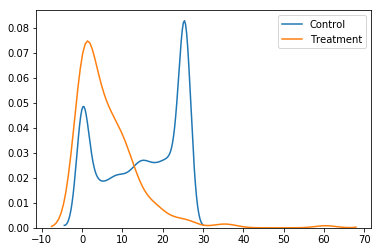

In [14]:
data[['RE74_div', 'RE75_div', 'RE78_div']] = data[['RE74', 'RE75', 'RE78']] / 1000


sns.kdeplot(data[data.Treated == 0].RE78_div, label='Control')
sns.kdeplot(data[data.Treated == 1].RE78_div, label='Treatment')

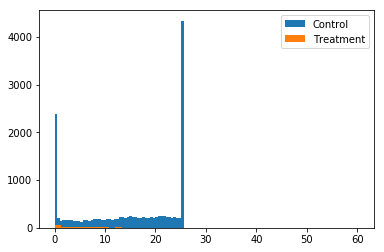

In [15]:
plt.hist(data[data.Treated == 0].RE78_div, label='Control', bins=50);
plt.hist(data[data.Treated == 1].RE78_div, label='Treatment', bins=50);
plt.legend();

In [16]:
causal_model = CausalModel(
    X=data[['Age', 'Education', 'Black', 'Hispanic', 'Married','Nodegree', 'RE74_div', 'RE75_div']].values,
    D=data.Treated.values,
    Y=data.RE78_div.values
)
causal_model.est_propensity()
causal_model.trim_s()
causal_model.stratify_s()

print(causal_model.summary_stats)
print(causal_model.estimates)
print(causal_model.propensity)
print(causal_model.strata)


Summary Statistics

                       Controls (N_c=385)         Treated (N_t=149)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        4.643        6.283        5.849        7.859        1.206

                       Controls (N_c=385)         Treated (N_t=149)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       28.452       11.604       25.752        7.343       -0.278
             X1       10.777        2.943       10.275        2.059       -0.197
             X2        1.000        0.000        1.000        0.000          nan
             X3        0.000        0.000        0.000        0.000          nan
             X4        0.314        0.465        0.154        0.363       -0.384
      

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\causalinference\core\summary.py:110: RuntimeWarning: invalid value encountered in true_divide
  return (mean_t-mean_c) / np.sqrt((sd_c**2+sd_t**2)/2)
